In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

Populating the interactive namespace from numpy and matplotlib


In [76]:
algo_df = pd.read_csv("pixel_em/ground_truth_rerun_full_PRJ_table_invariant_GTLSA_fixed.csv",index_col=0)
aw_df = pd.read_csv("pixel_em/ground_truth_rerun_full_PRJ_table_AW.csv",index_col=0)
algo_df = pd.concat([algo_df,aw_df])
mv_df = pd.read_csv("pixel_em/MV_PRJ_table.csv")
mv_df = mv_df.rename(columns={'MV_precision':"P [MV]",
                              "MV_recall":"R [MV]",
                               "MV_jaccard":"J [MV]"})
# # mv_df["thresh"]=0
# # mv_df["algorithm"]="MV"

# df = pd.concat([algo_df,mv_df])
algo_lst=["GT","isoGT","GTLSA","isoGTLSA","basic","AW","isoAW"]
newdf = mv_df 
for algo in algo_lst:
    data = algo_df[algo_df["algorithm"]==algo].rename(columns={"precision":"P [{}]".format(algo),
                                            "recall":"R [{}]".format(algo),
                                            "jaccard":"J [{}]".format(algo)})
    data = data.drop('algorithm',axis=1)
    newdf = newdf.merge(data)

newdf = newdf.drop_duplicates()
newdf.to_csv("cleaned_ground_truth_rerun_full_PRJ_table_all.csv")

In [3]:
# full = pd.read_csv("../TileEM/pixel_em/full_PRJ_table.csv") #Pixel EM basic + MV 

# MV = full[['num_workers', u'sample_num', u'objid', u'thresh', u'MV_precision',
#        u'MV_recall', u'MV_jaccard']]

# algo_lst=["GT","isoGT","GTLSA","isoGTLSA","basic","AW","isoAW"]
# df = pd.read_csv("pixel_em/MV_PRJ_table.csv")
# df = df.rename(columns={"MV_precision":"P [MV]",
#                        "MV_recall":"R [MV]",
#                        "MV_jaccard":"J [MV]"})
# # df = df.drop(['thresh'],axis=1)
# for mode in  algo_lst:
#     data =  pd.read_csv("../TileEM/pixel_em/{}_ground_truth_full_PRJ_table.csv".format(mode))
#     data = data.rename(columns={"EM_precision":"P [{}]".format(mode),
#                        "EM_recall":"R [{}]".format(mode),
#                        "EM_jaccard":"J [{}]".format(mode),})
#     df = df.merge(data)

# df = df.drop_duplicates()

In [27]:
#The std among basic and AW is lower than the other models
#df.groupby(["num_workers","sample_num","objid"]).std()

In [28]:
metric_keys = []
for algo in algo_lst:
    metric_keys.append('P [{}]'.format(algo))
    metric_keys.append('R [{}]'.format(algo))
    metric_keys.append('J [{}]'.format(algo))

In [29]:
df.to_csv("ground_truth_experiment.csv",index=None)

In [30]:
df[df["thresh"]==0].mean()[metric_keys]

P [GT]          0.920275
R [GT]          0.969654
J [GT]          0.894644
P [isoGT]       0.940108
R [isoGT]       0.946618
J [isoGT]       0.895458
P [GTLSA]       0.916429
R [GTLSA]       0.951866
J [GTLSA]       0.876464
P [isoGTLSA]    0.942290
R [isoGTLSA]    0.936681
J [isoGTLSA]    0.889516
P [basic]       0.948281
R [basic]       0.935594
J [basic]       0.890103
P [AW]          0.947050
R [AW]          0.934414
J [AW]          0.887746
P [isoAW]       0.911419
R [isoAW]       0.917103
J [isoAW]       0.848642
dtype: float64

In [31]:
df[df["thresh"]==0].filter(regex="J").mean()

J [MV]          0.882326
J [GT]          0.894644
J [isoGT]       0.895458
J [GTLSA]       0.876464
J [isoGTLSA]    0.889516
J [basic]       0.890103
J [AW]          0.887746
J [isoAW]       0.848642
dtype: float64

In [32]:
df[df["thresh"]==0].filter(regex="J").std()

J [MV]          0.103300
J [GT]          0.066666
J [isoGT]       0.111768
J [GTLSA]       0.074078
J [isoGTLSA]    0.130009
J [basic]       0.090435
J [AW]          0.089752
J [isoAW]       0.120213
dtype: float64

GT> basic>MV>isoGT=GTLSA>isoGTLSA

iso models tend to have greater variance 

#### Ranking Jaccard 

In [19]:
rank_df = df[df["thresh"]==0].filter(regex="J").rank(axis=1,ascending=False,method="average")
rank_df.mean()

J [MV]          4.560115
J [GT]          4.673664
J [isoGT]       3.995229
J [GTLSA]       7.044847
J [isoGTLSA]    3.899809
J [basic]       3.527672
J [AW]          3.909351
J [isoAW]       4.389313
dtype: float64

In [20]:
df[df["thresh"]==0].filter(regex="J").mean()

J [MV]          0.917336
J [GT]          0.922642
J [isoGT]       0.866965
J [GTLSA]       0.896647
J [isoGTLSA]    0.874786
J [basic]       0.921768
J [AW]          0.920465
J [isoAW]       0.893934
dtype: float64

In [25]:
#Check that lower numbers correspond to lower values 
# rank_df.head()
# df[df["thresh"]==0].filter(regex="J").head()

Lower ranks means higher J. isoGT and isGTLSA does better in rank. 

#### Visualizations 

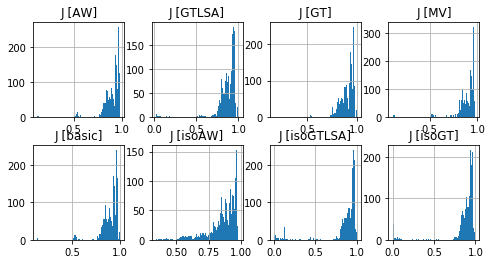

In [28]:
fig = plt.figure()
a = df.filter(regex="J").hist(bins=80,layout=(2,4),figsize=(8,4))

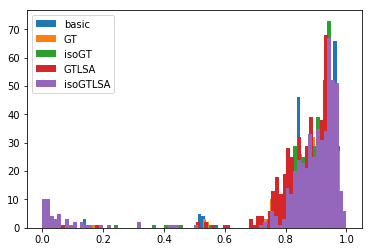

In [57]:
a = plt.hist(df["J [basic]"],label="basic",bins=80)
a = plt.hist(df["J [GT]"],label="GT",bins=80)
a = plt.hist(df["J [isoGT]"],label="isoGT",bins=80)
a = plt.hist(df["J [GTLSA]"],label="GTLSA",bins=80)
a = plt.hist(df["J [isoGTLSA]"],label="isoGTLSA",bins=80)
plt.legend()


#### If we only look at "good objects", ones with jaccard >0.6 then what would the average look like (i.e. filter out things that has gone terribly wrong, and how many are there)

In [37]:
Jkeys = df.keys()[df.keys().str.contains('J')]
(df[Jkeys]>0.9).sum()

J [MV]          884
J [GT]          884
J [isoGT]       920
J [GTLSA]       759
J [isoGTLSA]    924
J [basic]       904
J [AW]          887
J [isoAW]       706
dtype: int64

In [35]:
df[(df[Jkeys]>0.5).sum(ggaxis=1)==5].filter(regex='J').mean()

J [MV]          0.563127
J [GT]          0.838403
J [isoGT]       0.326729
J [GTLSA]       0.321195
J [isoGTLSA]    0.314770
J [basic]       0.570948
J [AW]          0.569251
J [isoAW]       0.806194
dtype: float64

#### Count how many GTLSA > basic 

In [29]:
df[['J [basic]','J [AW]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    2000.5
J [AW]       2514.5
dtype: float64

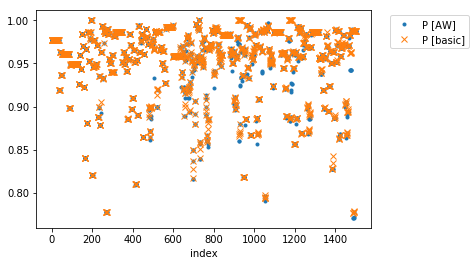

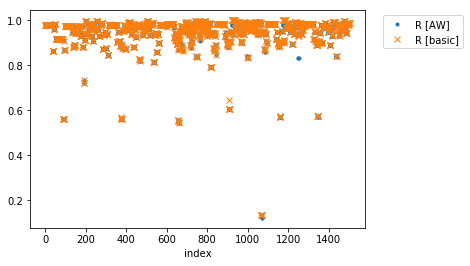

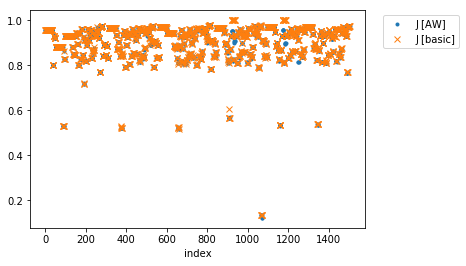

In [33]:
compare_PRJ_fixed_sample_object(df,'AW','basic')

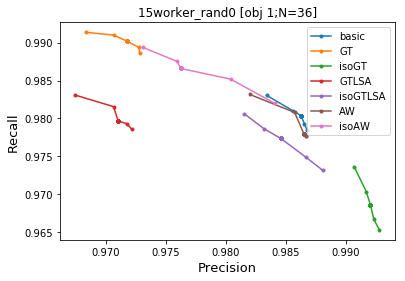

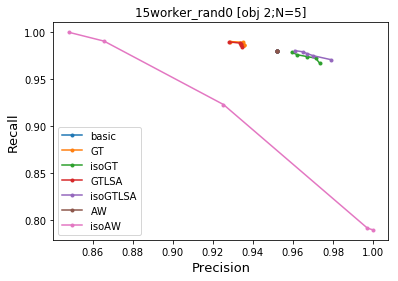

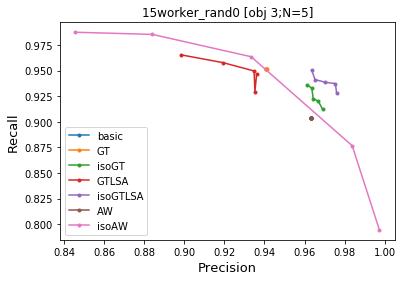

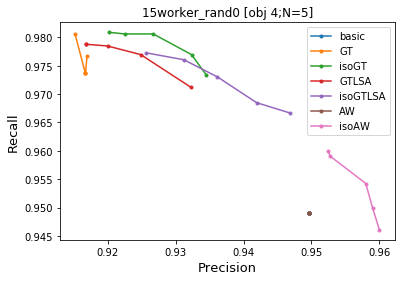

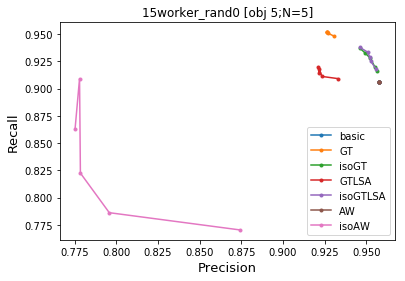

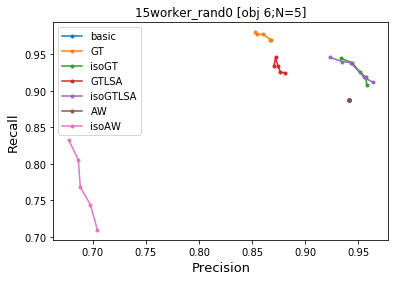

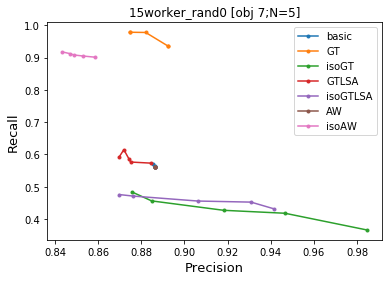

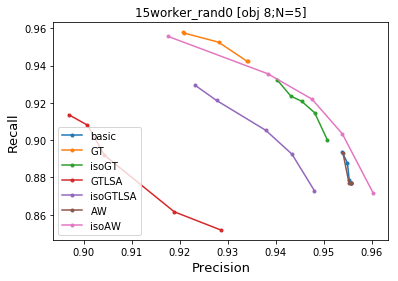

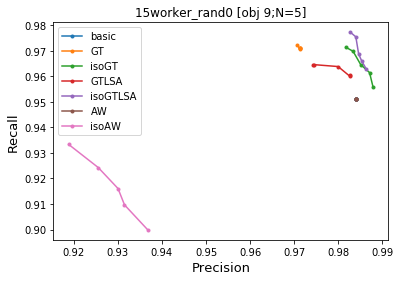

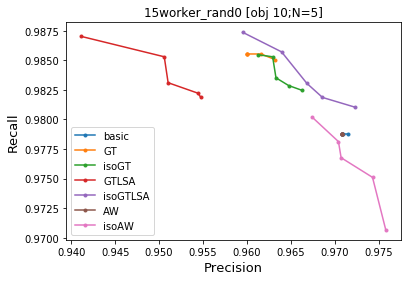

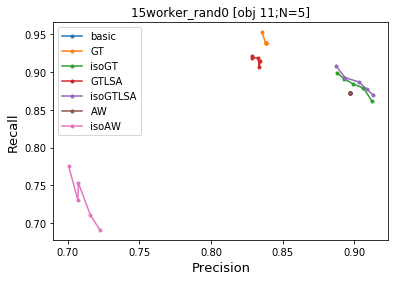

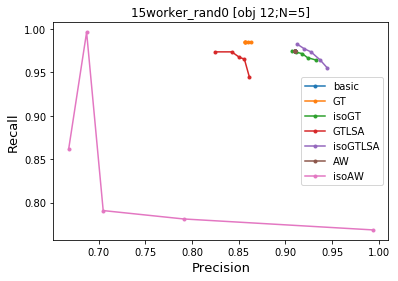

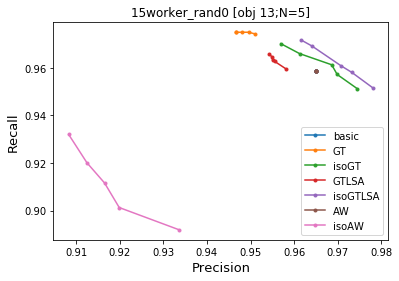

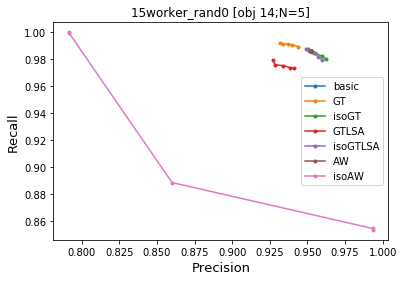

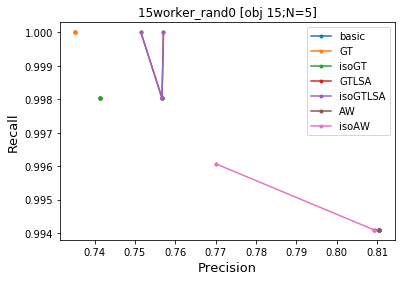

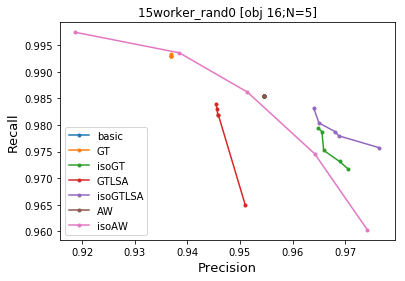

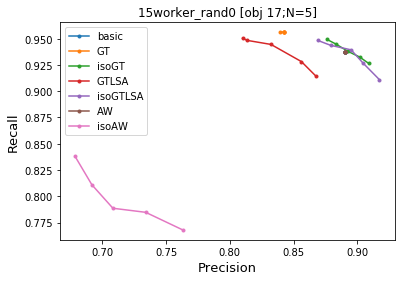

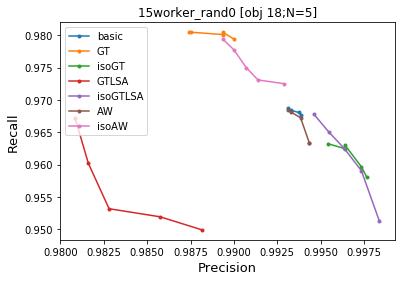

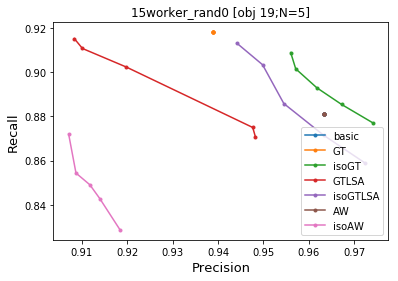

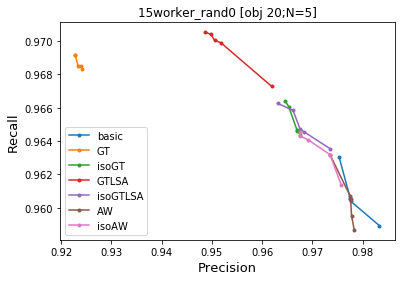

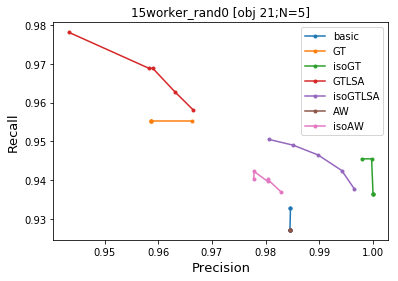

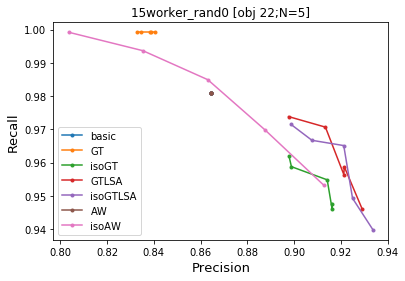

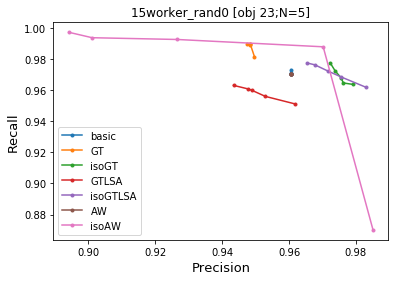

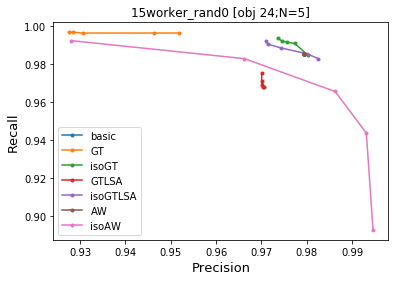

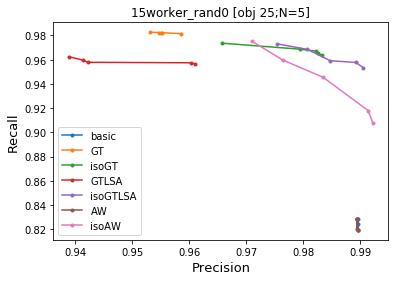

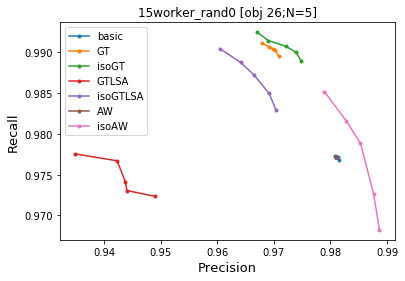

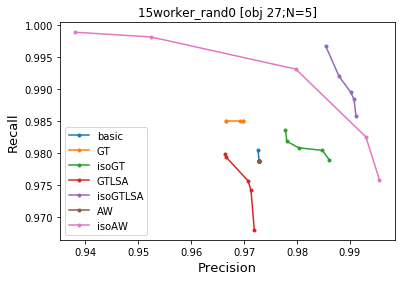

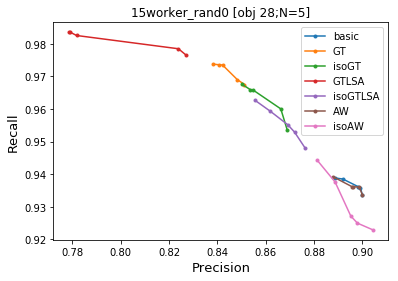

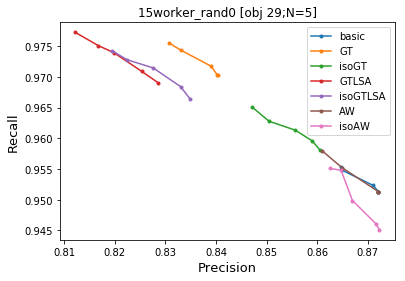

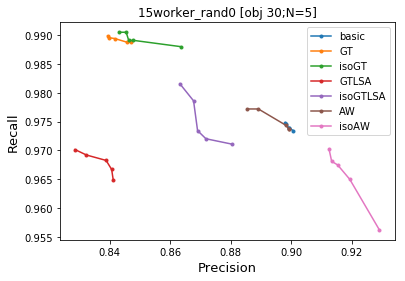

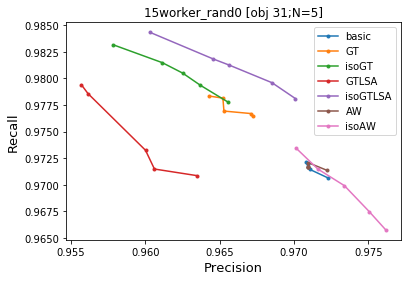

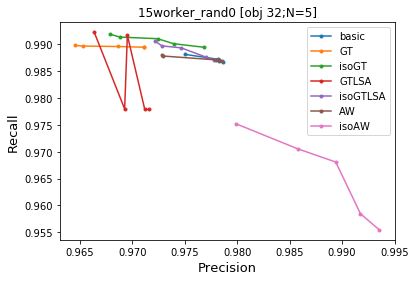

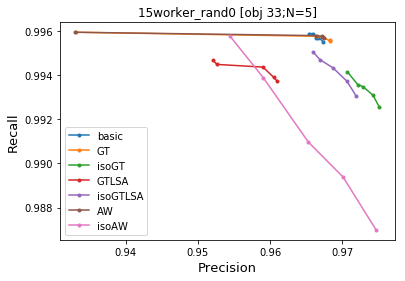

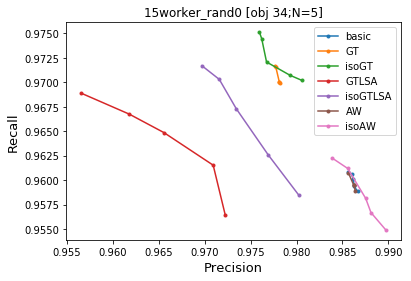

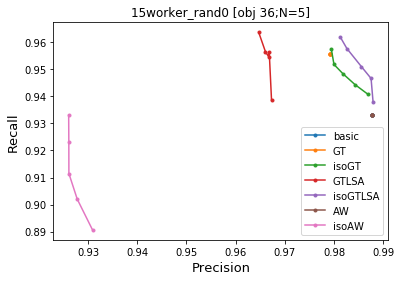

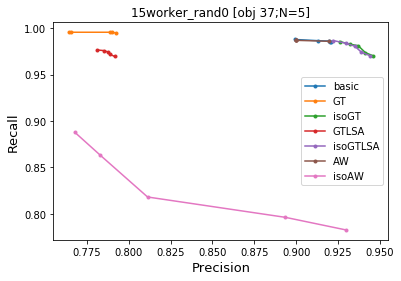

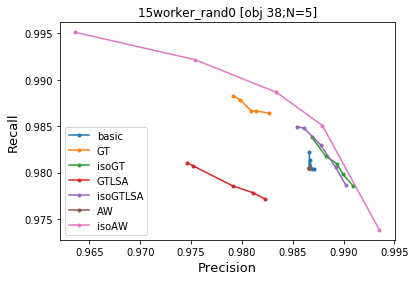

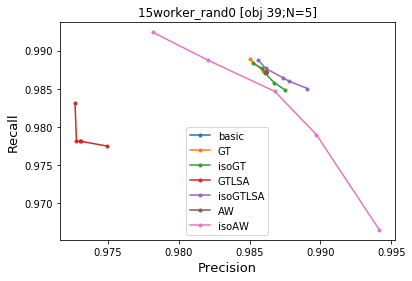

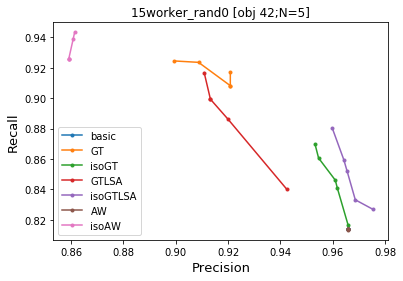

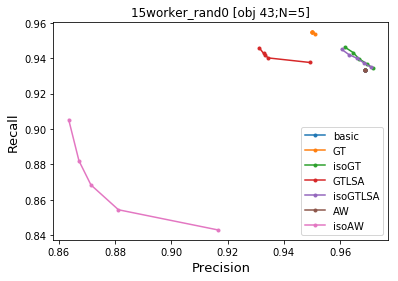

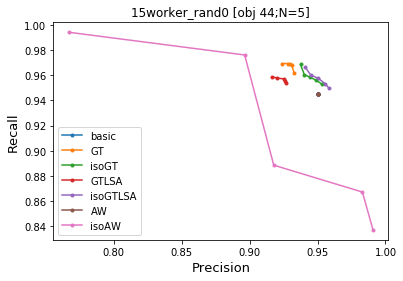

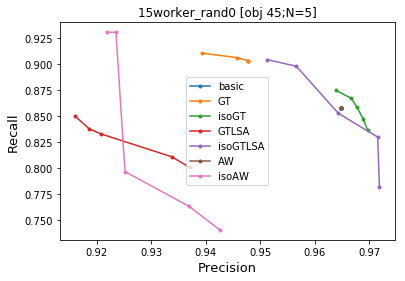

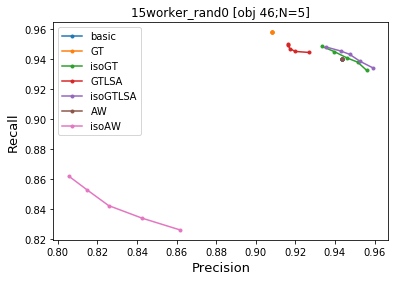

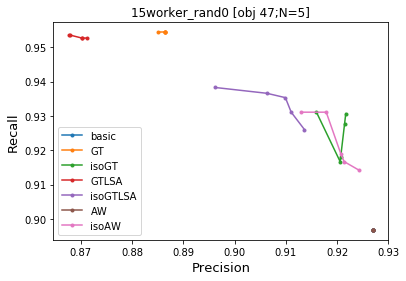

In [47]:
for i in object_lst:
    plot_PRcurve(df,i,15,0)

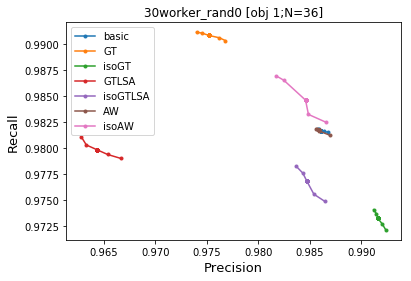

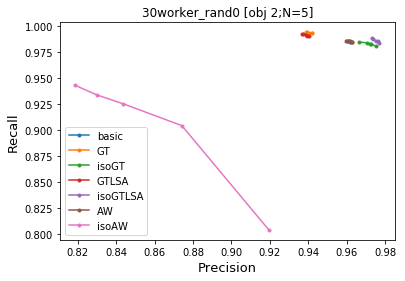

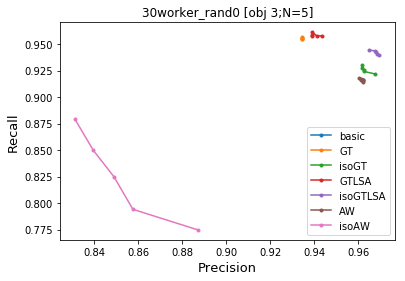

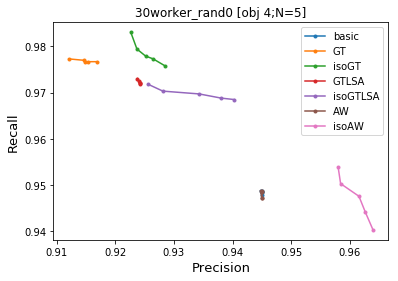

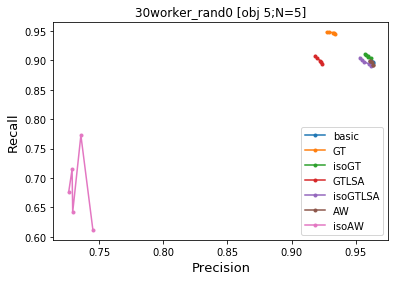

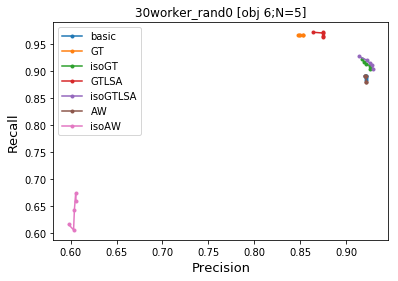

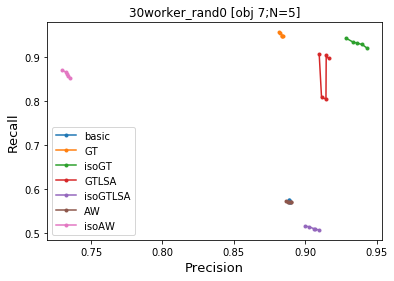

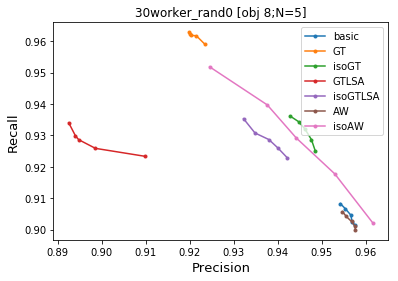

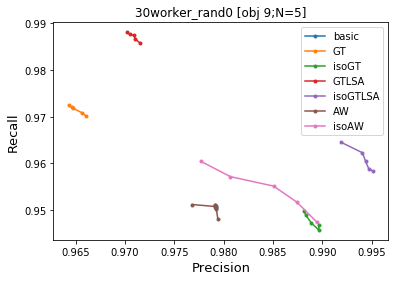

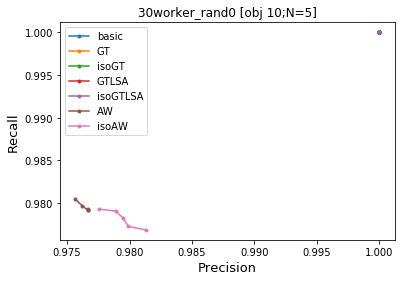

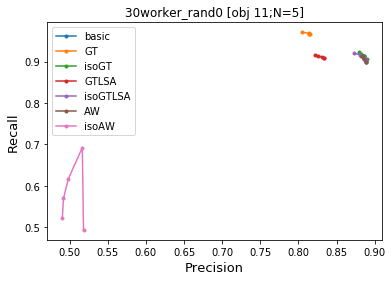

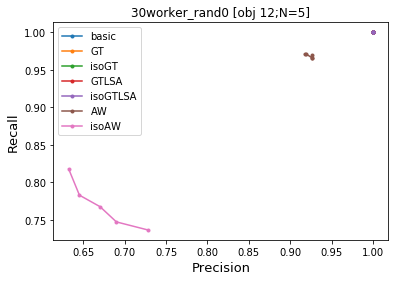

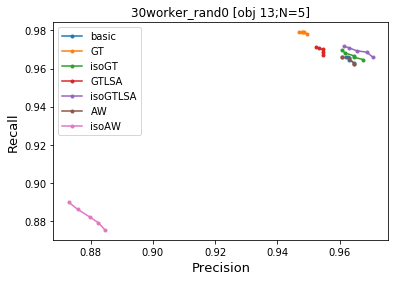

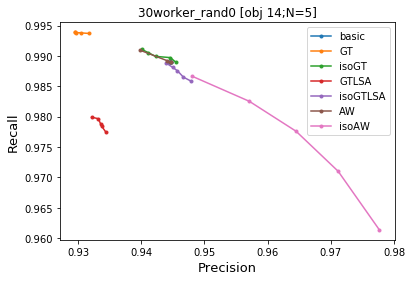

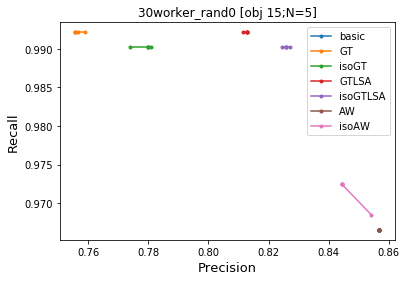

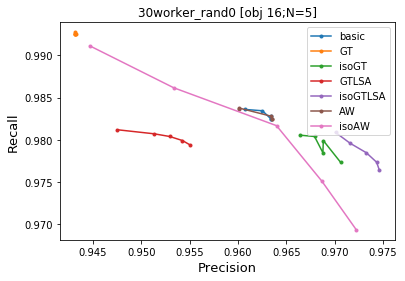

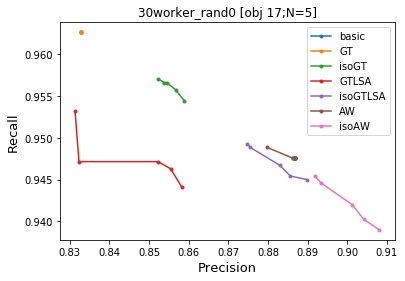

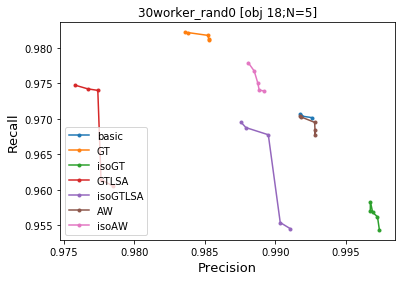

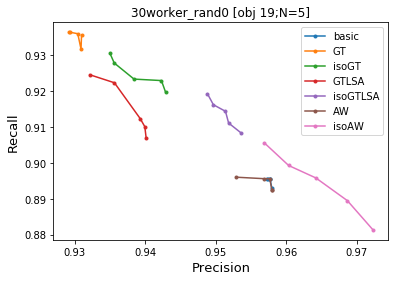

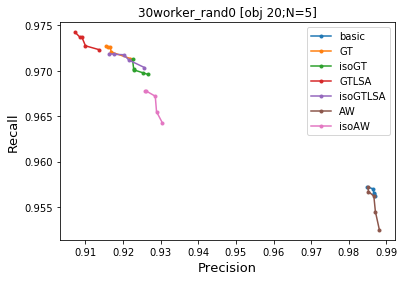

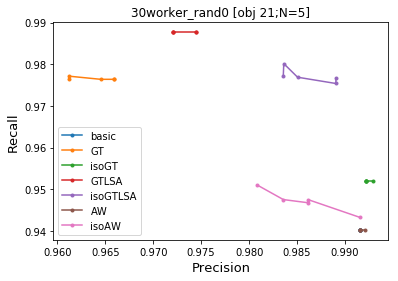

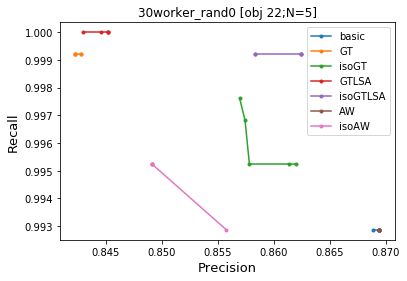

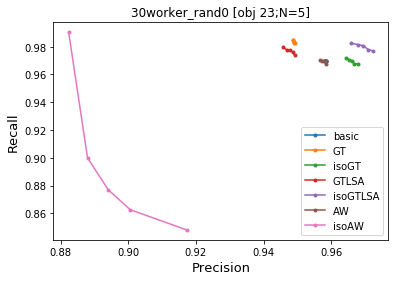

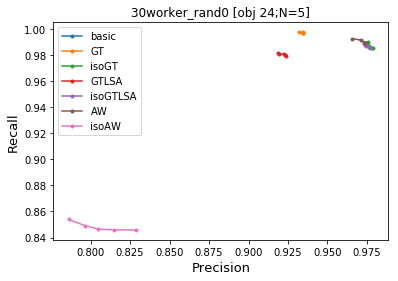

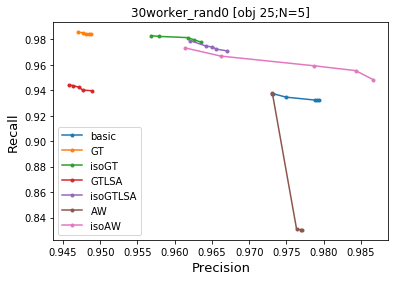

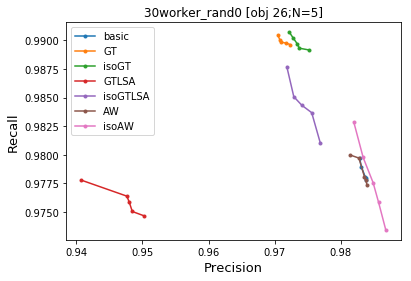

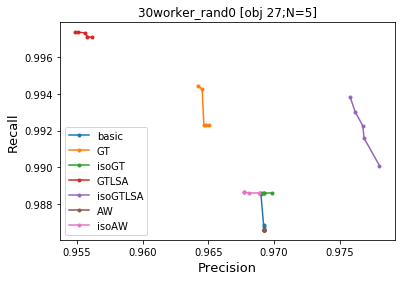

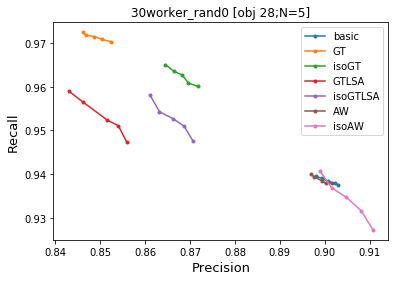

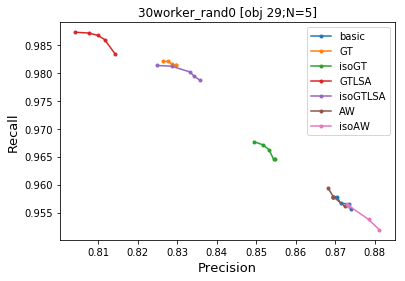

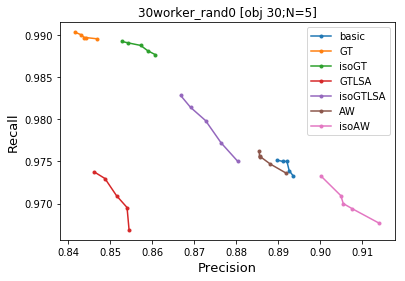

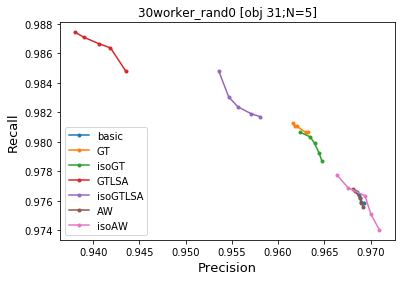

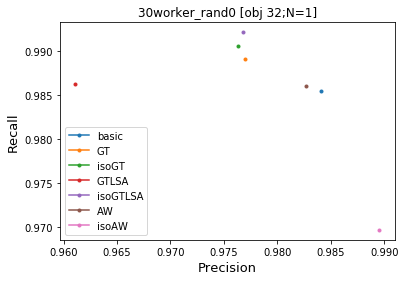

In [45]:
for i in object_lst:
    plot_PRcurve(df,i,30,0)

------------------------------------------------------------------------